<img style="float: right;" src="https://www.duoc.cl/wp-content/uploads/2021/03/logos_sedesv1-23.png" width="300" height="300">

## <center> ¿Lloverá en Australia?
    
### Integrantes: 
#### Rafael Araya, Paola Arcos, Ivette Poblete, Marco Salinas, Esteban Varas.
    

## Contexto:
Australia es uno de los países con mayor extensión del mundo y el continente más seco y llano del planeta. El clima predominante es el desértico y semiárido, las principales características climáticas australianas son inviernos suaves y veranos cálidos, así como abundante sol y poca humedad. Las precipitaciones son muy escasas en el interior y aumentan en las zonas costeras, de modo que las zonas mejor regadas son los litorales norte, este, sudeste y sudoeste. 

Se dispone de un set de datos de observaciones meteorológicas diarias de múltiples ubicaciones en Australia, obtenidas de la Oficina de Meteorología de la Commonwealth de Australia y procesadas que crearon este conjunto de datos de muestra, los datos se han procesado y nos proporcionaron nuestra variable objetivo RainTomorrow(si hay lluvia al día siguiente - No / Sí)


In [1]:
import numpy as np
import pandas as pd


#Instalar <conda install -c plotly plotly=4.8.1 en el promt de anaconda>
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV
from sklearn import preprocessing 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler 
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

# 1. EDA

In [2]:
data = pd.read_csv('weatherAUS.csv')
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No


*🡅 Aquí se puede ver un ejemplo de los datos entregados 🡅*

In [3]:
data.shape

(142193, 24)

*🡅 Existe un total de 142193 columnas y 24 filas de datos 🡅*

#### Datos discretos

In [4]:
data.select_dtypes('object')

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No
...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,E,ESE,E,No,No
142189,2017-06-21,Uluru,E,SE,ENE,No,No
142190,2017-06-22,Uluru,NNW,SE,N,No,No
142191,2017-06-23,Uluru,N,SE,WNW,No,No


*🡅 Las variables que contienen datos son 7: "Date", "Location", "WindGustDir", "WindDir9am", "WindDir3pm", "RainToday", "RainTomorrow" 🡅*

#### Datos continuos

In [5]:
data.select_dtypes('float')

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,1.0
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,3.5,21.8,0.0,NaN,NaN,31.0,15.0,13.0,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,0.0
142189,2.8,23.4,0.0,NaN,NaN,31.0,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,0.0
142190,3.6,25.3,0.0,NaN,NaN,22.0,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,0.0
142191,5.4,26.9,0.0,NaN,NaN,37.0,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,0.0


*🡅 Se puede ver que la mayor cantidad de datos son datos continuos, con una cantidad de 17 variables 🡅*

#### Tipos de datos 

In [6]:
data.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RISK_MM          float64
RainTomorrow      object
dtype: object

*🡅 Aquí se pueden ver los tipos de datos de cada variable 🡅*

#### Variables categóricas

In [7]:
Categoricas = [i for i in data.columns if data[i].dtypes =='O']
print ('Variables Categoricas:',Categoricas)

Variables Categoricas: ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


#### Variables númericas

In [8]:
Numericas = [i for i in data.columns if i not in Categoricas]
print ('Variables numericas :', Numericas)

Variables numericas : ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RISK_MM']


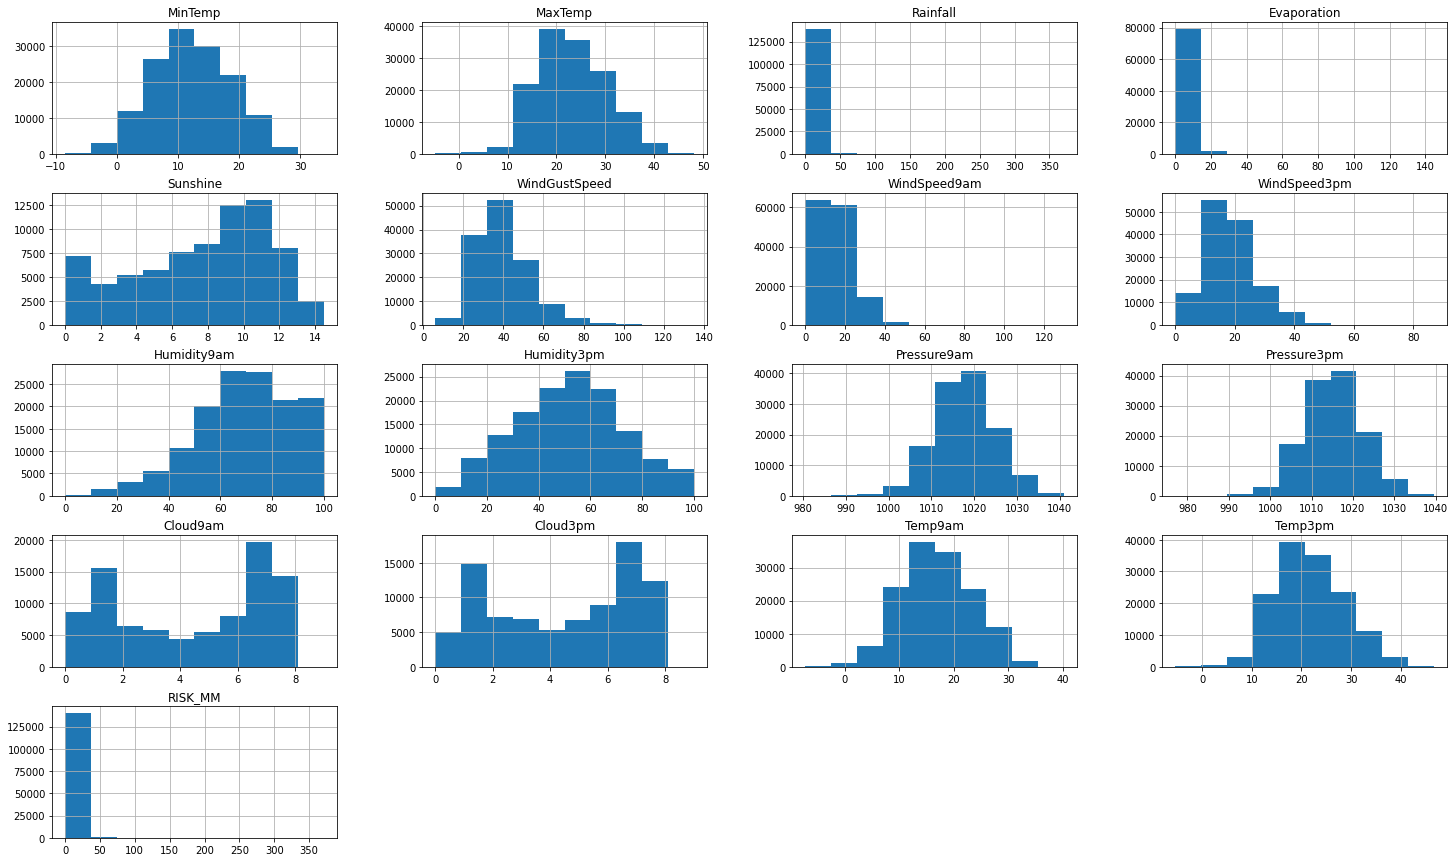

In [9]:
data[Numericas].hist(bins=10, figsize= (25,15))
plt.savefig("Distribucion de variables numericas.png")
plt.show()

🡅 Aquí se puede visualizar los tipos de distribuciones que tiene cada variable númerica 🡅

In [10]:
for feature in data.columns:
    print('Total de valores nulos de', feature, '=', data[feature].isna().sum())

Total de valores nulos de Date = 0
Total de valores nulos de Location = 0
Total de valores nulos de MinTemp = 637
Total de valores nulos de MaxTemp = 322
Total de valores nulos de Rainfall = 1406
Total de valores nulos de Evaporation = 60843
Total de valores nulos de Sunshine = 67816
Total de valores nulos de WindGustDir = 9330
Total de valores nulos de WindGustSpeed = 9270
Total de valores nulos de WindDir9am = 10013
Total de valores nulos de WindDir3pm = 3778
Total de valores nulos de WindSpeed9am = 1348
Total de valores nulos de WindSpeed3pm = 2630
Total de valores nulos de Humidity9am = 1774
Total de valores nulos de Humidity3pm = 3610
Total de valores nulos de Pressure9am = 14014
Total de valores nulos de Pressure3pm = 13981
Total de valores nulos de Cloud9am = 53657
Total de valores nulos de Cloud3pm = 57094
Total de valores nulos de Temp9am = 904
Total de valores nulos de Temp3pm = 2726
Total de valores nulos de RainToday = 1406
Total de valores nulos de RISK_MM = 0
Total de val

*🡅 Aquí se puede visualizar la cantidad de datos nulos que hay por variable, la variable con mayor cantidad de nulos es "Sunshine" 🡅*

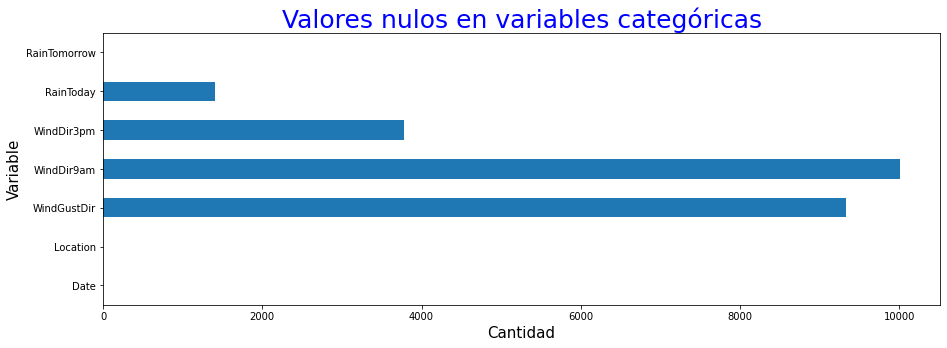

In [11]:
data[Categoricas].isnull().sum().plot.barh(figsize=(15,5))
plt.title("Valores nulos en variables categóricas",fontsize=25,color="blue")
plt.xlabel("Cantidad", fontsize=15)
plt.ylabel("Variable", fontsize=15)
plt.savefig("Valores nulos en variables categóricas.png")
plt.show()

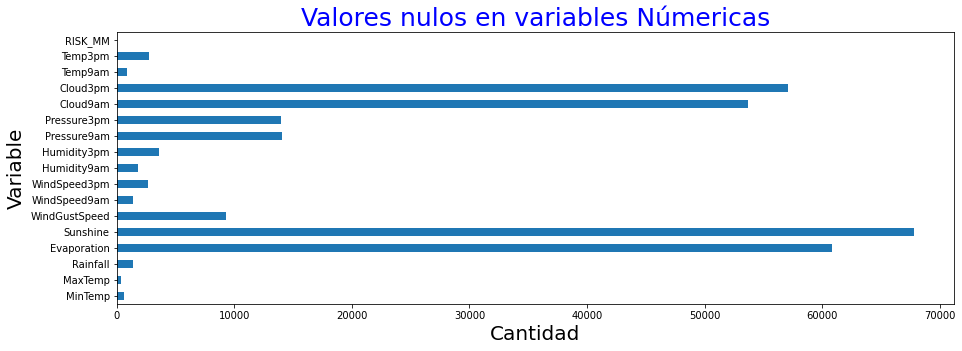

In [12]:
data[Numericas].isnull().sum().plot.barh(figsize=(15,5))
plt.title("Valores nulos en variables Númericas",fontsize=25,color="blue")
plt.xlabel("Cantidad", fontsize=20)
plt.ylabel("Variable", fontsize=20)
plt.savefig("Valores nulos en variables Númericas.png")
plt.show()

🡅 Gráficamos los valores nulos en las variables cátegoricas y numéricas 🡅

## Representacion Graficas de Outliers  numericos en nuestra data a nivel general 

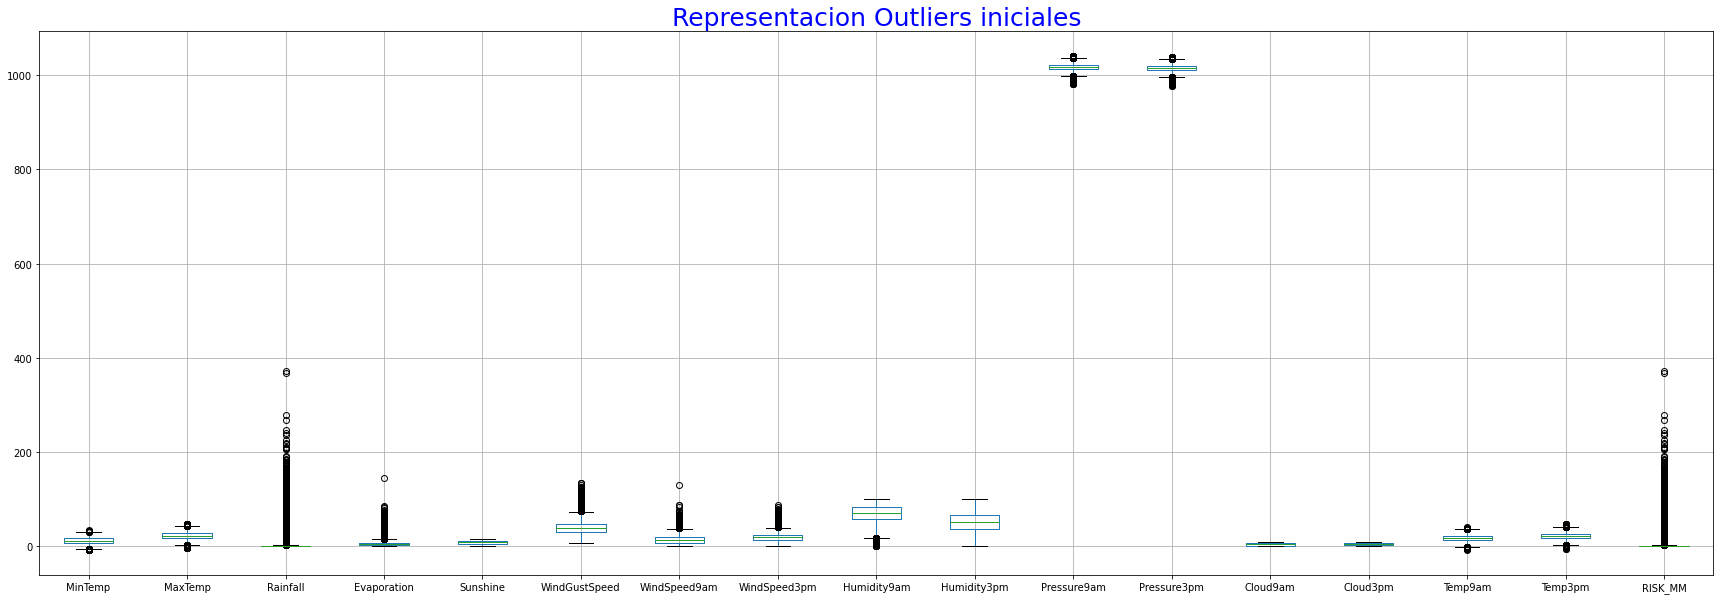

In [13]:
data[Numericas].boxplot(figsize=(30, 10))
plt.savefig('Deteccion de outliers iniciales.png')
plt.title("Representacion Outliers iniciales", fontsize=25, color="blue")
plt.show()

*🡅 Aquí se puede ver un gráfico de los outliers de todas las variables númericas, se aprecia que las variables con mayor cantidad de outliers son "Rainfall"

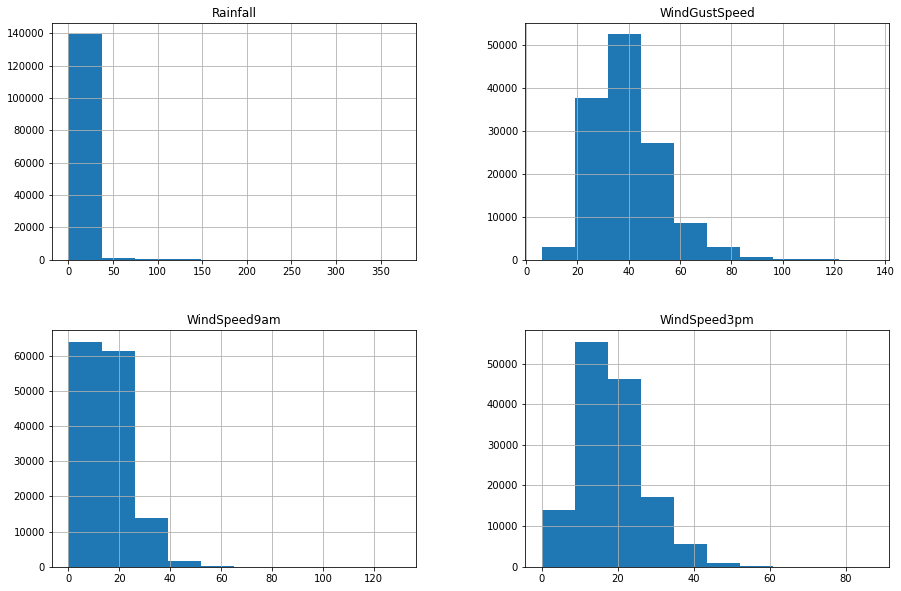

In [14]:
outlier = ['Rainfall','WindGustSpeed','WindSpeed9am','WindSpeed3pm']
data[outlier].hist(bins=10, figsize=(15,10))
plt.savefig("Outliers mas representativos.png")
plt.show()

🡅 Podemos ver, que los Outliers estan sezgados hacia la izquierda, lo que nos lleva a la conclusión de debemos hacer algo.🡅

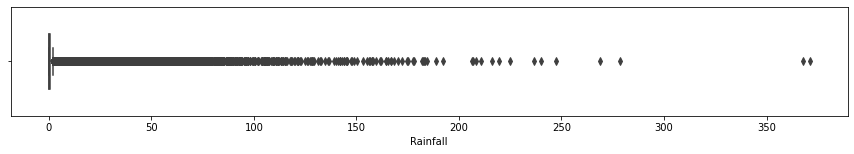

In [15]:
plt.figure(figsize=(15,2))
sns.boxplot(x=data["Rainfall"],fliersize=5, width=0.5)
plt.savefig('Outliers alto_Rainfall.png')

🡅 Cómo vemos en la variable rainfall encontramos una alta cantidad de outliers 🡅

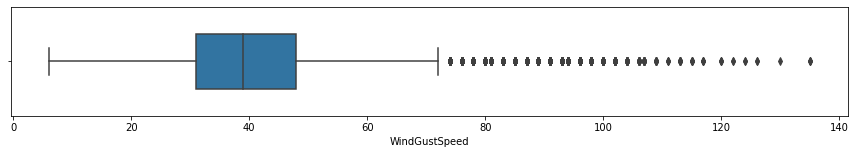

In [16]:
plt.figure(figsize=(15,2))
sns.boxplot(x=data["WindGustSpeed"],fliersize=5, width=0.5)
plt.savefig('Outliers alto_WindGustSpeed.png')

🡅 En la variable WindGustSpeed encontramos una alta cantidad de outliers desde el rango 70 hasta el rango 136 🡅

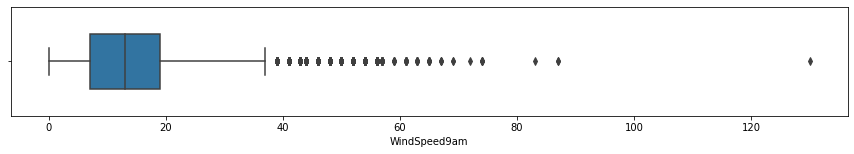

In [17]:
plt.figure(figsize=(15,2))
sns.boxplot(x=data["WindSpeed9am"],fliersize=5, width=0.5)
plt.savefig('Outliers alto_WindSpeed9am.png')

🡅 En la variable WindSpeed9am encontramos una alta cantidad de outliers, los que van desde el rango 39 hasta el rango 133 🡅

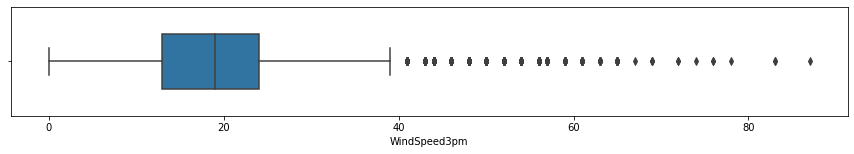

In [18]:
plt.figure(figsize=(15,2))
sns.boxplot(x=data["WindSpeed3pm"],fliersize=5, width=0.5)
plt.savefig('Outliers alto_WindSpeed3pm.png')

🡅 En la variable WindSpeed3pm encontramos una alta cantidad de outliers, los que van desde el rango 42 hasta el rango 90 🡅

In [19]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


## Mapa de correlación antes de las intervenciones

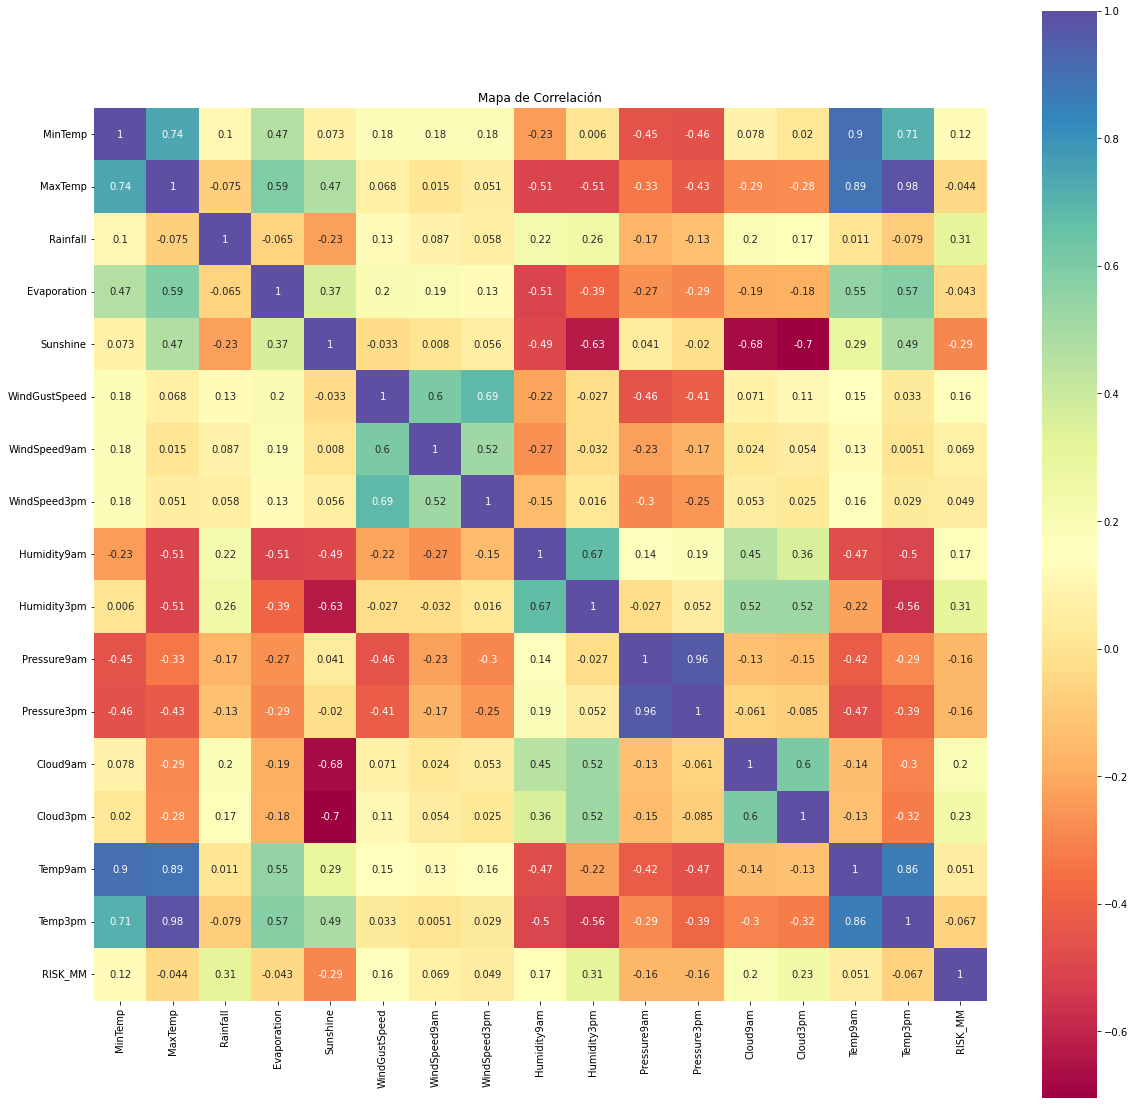

In [20]:
corr = data.corr(method ='pearson')
plt.figure(figsize=(20,20))
sns.heatmap(data=corr,square=True, annot=True,cmap='Spectral').set_title ("Mapa de Correlación");

*🡅 De este gráfico se puede visualizar:*
​
1. Las temperaturas a las 3PM estan altamente relacionadas con las máximas temperaturas de cada dáa, de igual forma las temperatura de las 9AM, ya que, la temperatura máxima es muy parecida o es la misma temperatura que las 3 pm, la correlación es de un 0.74
​
2. la temperatura máxima es proporcional a la temperatura mínima, es decir, entre mas alta la temperatura máxima del día mas alta la temperatura mínima. La correlación de estas variables es 0.74
​
3. La Humedad de las 9AM es correlativa con la humedad de las 3pm, tiene una correlación del 0.67
​
4. Existe relación entre la evaporación y la temperatura de las 3 pm, mientras más temperatura exista, mayor sera la evaporación, la correlación entre estas variables es de un 0.57


## Intervenciones

In [21]:
#Contar nulos por columna
sum_null = data[Numericas].isnull().sum()
#Cantidad de filas
total_filas = data.shape[0]
#Porcentaje de nulos en el dataFrame
porcentaje_num = (sum_null / total_filas) * 100
#Tabla total valores nulos por columna (cantidad y porcentaje)
total_num = pd.DataFrame({'Cantidad de nulos': sum_null , 'Porcentaje de nulos': porcentaje_num})
total_num

,Cantidad de nulos,Porcentaje de nulos
MinTemp,637,0.447983
MaxTemp,322,0.226453
Rainfall,1406,0.988797
Evaporation,60843,42.789026
Sunshine,67816,47.692924
WindGustSpeed,9270,6.519308
WindSpeed9am,1348,0.948007
WindSpeed3pm,2630,1.849599
Humidity9am,1774,1.247600
Humidity3pm,3610,2.538803


In [22]:
kill_null = list(total_num[total_num['Porcentaje de nulos'] > 35].index)
kill_null

['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm']

🡅 Variables con pocentajes de nulos mayores al 35% 🡅

In [23]:
data.drop(kill_null, axis=1, inplace=True)

🡅 Eliminamos las variables con porcentaje de nulos mayores al 35% 🡅

In [24]:
var_bajo = list(total_num[(total_num['Porcentaje de nulos'] <= 35)].index)
var_bajo

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm',
 'RISK_MM']

🡅 Mostramos las variables con nulos menores o igual a 35% 🡅

In [25]:
for nu in var_bajo:
    promedio = data[nu].mean()
    data[nu] = data[nu].fillna(promedio)
# Comprobamos el resultado del tratamiento
data[var_bajo].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RISK_MM          0
dtype: int64

In [26]:
numericas = [num for num in data.columns if data[num].dtype!='O']
numericas

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm',
 'RISK_MM']

🡅 Mostramos el resultado del tratamiento 🡅

### Tratamiento de outliers

['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 'RISK_MM']


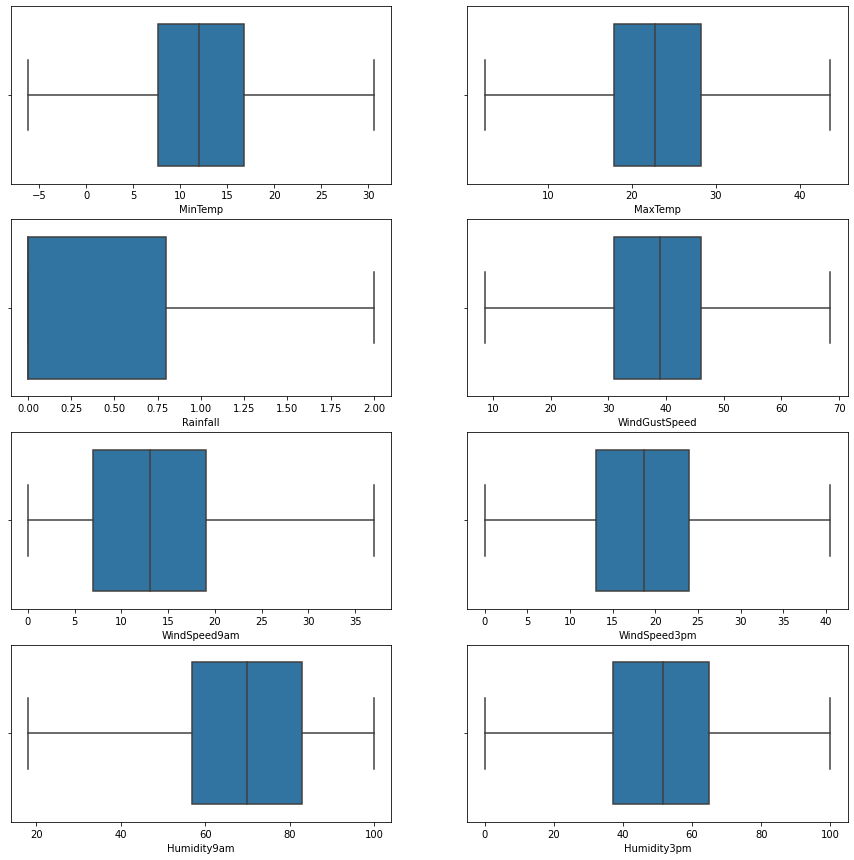

In [27]:
#Eliminamos los Valos nulos de las diferentes variables dado su percentil
lsUpper = []
lsLower = []
def removeOutliers(numericas):
    for i in range(len(numericas)):
        q1 = data[numericas[i]].quantile(0.25)
        q3 = data[numericas[i]].quantile(0.75)
        IQR = q3-q1
        minimum = q1 - 1.5 * IQR
        maximum = q3 + 1.5 * IQR
        data.loc[(data[numericas[i]] <= minimum), numericas[i]] = minimum
        data.loc[(data[numericas[i]] >= maximum), numericas[i]] = maximum  
removeOutliers(numericas)

num_of_rows = 4
num_of_cols = 2
fig, ax = plt.subplots(num_of_rows, num_of_cols, figsize=(15,15))
print(numericas)
i=0;j=0;k=0;
while i<num_of_rows:
    while j<num_of_cols:
        sns.boxplot(data[numericas[k]], ax=ax[i, j])
        k+=1;j+=1
    j=0;i+=1
plt.savefig('Removimos  Outliers de columnas numericas dado su percentil.png')
plt.show()

🡅 Se remueven outliers 🡅

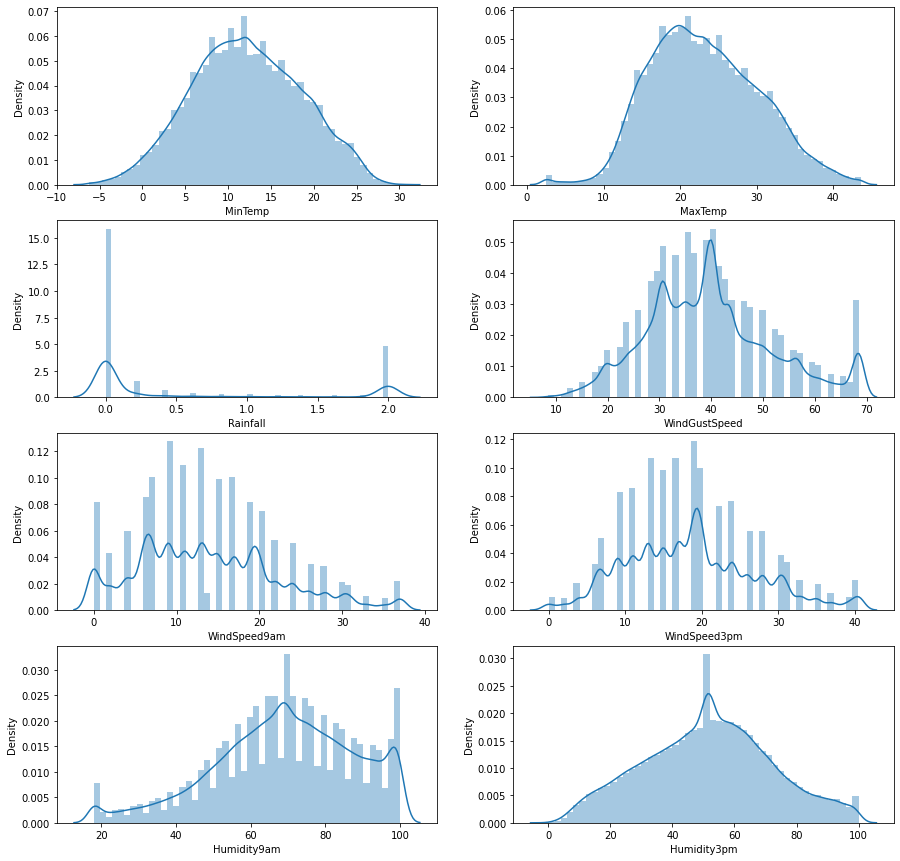

In [28]:
#Graficos la Nueva distribucion de las variables despues de realizar una limpieza de datos
def plotHist():
    fig, ax =plt.subplots(4,2, figsize=(15,15))
    i=0;j=0;k=0
    while i<=3:
        while j<=1:
            sns.distplot(data[numericas[k]], ax=ax[i, j])
            j+=1;k+=1
        j=0;i+=1;
    plt.savefig('Distribucion despues de remover Outliers de columnas numericas.png')
    plt.show()
plotHist()

🡅 Gráficos de la nueva distribución de las variables despues de realizar una limpieza de datos, como podemos ver los gráficos se pueden ver de una manera más normalizada 🡅

# Transformacion de variables

In [29]:
data_t = data[:]

In [30]:
data_t['Location'] = pd.Categorical(data_t['Location'])
datasetDummies_Location = pd.get_dummies(data_t['Location'], prefix = 'Location')

data_t['WindGustDir'] = pd.Categorical(data_t['WindGustDir'])
datasetDummies_WindGustDir = pd.get_dummies(data_t['WindGustDir'], prefix = 'WindGustDir')

data_t['WindDir9am'] = pd.Categorical(data_t['WindDir9am'])
datasetDummies_WindDir9am = pd.get_dummies(data_t['WindDir9am'], prefix = 'WindDir9am')

data_t['WindDir3pm'] = pd.Categorical(data_t['WindDir3pm'])
datasetDummies_WindDir3pm = pd.get_dummies(data_t['WindDir3pm'], prefix = 'WindDir3pm')

data_t['RainToday'] = pd.Categorical(data_t['RainToday'])
datasetDummies_RainToday = pd.get_dummies(data_t['RainToday'], prefix = 'RainToday')

data_t['RainTomorrow'] = pd.Categorical(data_t['RainTomorrow'])
datasetDummies_RainTomorrow = pd.get_dummies(data_t['RainTomorrow'], prefix = 'RainTomorrow')

In [31]:
data_t.drop("Location", axis=1, inplace=True)
data_t.drop("WindGustDir", axis=1, inplace=True)
data_t.drop("WindDir9am", axis=1, inplace=True)
data_t.drop("WindDir3pm", axis=1, inplace=True)
data_t.drop("RainToday", axis=1, inplace=True)
data_t.drop("RainTomorrow", axis=1, inplace=True)

data_t = pd.concat([data_t, datasetDummies_Location], axis=1)
data_t = pd.concat([data_t, datasetDummies_WindGustDir], axis=1)
data_t = pd.concat([data_t, datasetDummies_WindDir9am], axis=1)
data_t = pd.concat([data_t, datasetDummies_WindDir3pm], axis=1)
data_t = pd.concat([data_t, datasetDummies_RainToday], axis=1)
data_t = pd.concat([data_t, datasetDummies_RainTomorrow], axis=1)

In [32]:
data_t['Date'] = pd.to_datetime(data_t['Date'])

data_t['Year'] = data_t['Date'].dt.year

data_t['Month'] = data_t['Date'].dt.month

data_t['Day'] = data_t['Date'].dt.day

# Eliminamos la columna anterior que contenia la fecha
data_t.drop('Date', axis=1, inplace = True)
#Creamos la variable season para ver la temporada segun el mes
data_t['Season'] = data_t['Month'].replace((1,2,3,4,5,6,7,8,9,10,11,12),('Summer','Summer','Autumn','Autumn','Autumn','Winter','Winter','Winter','Spring','Spring','Spring','Summer'))

data_t.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes,RainTomorrow_No,RainTomorrow_Yes,Year,Month,Day,Season
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,...,1,0,1,0,1,0,2008,12,1,Summer
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,...,0,1,1,0,1,0,2008,12,2,Summer
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,...,0,1,1,0,1,0,2008,12,3,Summer
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,...,0,0,1,0,1,0,2008,12,4,Summer
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,...,0,0,1,0,1,0,2008,12,5,Summer


In [33]:
data_t['Season'].replace(['Summer','Autumn','Winter','Spring'],[1,2,3,4],inplace = True)

In [34]:
labelencoder = LabelEncoder()
data_t['Year'] = labelencoder.fit_transform(data_t['Year'])
data_t['Month'] = labelencoder.fit_transform(data_t['Month'])
data_t['Day'] = labelencoder.fit_transform(data_t['Day'])
data_t

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes,RainTomorrow_No,RainTomorrow_Yes,Year,Month,Day,Season
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,...,1,0,1,0,1,0,1,11,0,1
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,...,0,1,1,0,1,0,1,11,1,1
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,...,0,1,1,0,1,0,1,11,2,1
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,...,0,0,1,0,1,0,1,11,3,1
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,...,0,0,1,0,1,0,1,11,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,3.5,21.8,0.0,31.0,15.0,13.0,59.0,27.0,1024.7,1021.2,...,0,0,1,0,1,0,10,5,19,3
142189,2.8,23.4,0.0,31.0,13.0,11.0,51.0,24.0,1024.6,1020.3,...,0,0,1,0,1,0,10,5,20,3
142190,3.6,25.3,0.0,22.0,13.0,9.0,56.0,21.0,1023.5,1019.1,...,0,0,1,0,1,0,10,5,21,3
142191,5.4,26.9,0.0,37.0,9.0,9.0,53.0,24.0,1021.0,1016.8,...,1,0,1,0,1,0,10,5,22,3


In [35]:
df_WindGustDir = pd.get_dummies(data["WindGustDir"], prefix="1")
df_WindDir9am = pd.get_dummies(data["WindDir9am"], prefix="2")
df_WindDir3pm = pd.get_dummies(data["WindDir3pm"], prefix="3")
df_RainToday = pd.get_dummies(data["RainToday"])
location_ohe = pd.get_dummies(data["Location"])
data_new = pd.concat([data, df_WindGustDir, df_WindDir9am, df_WindDir3pm, df_RainToday, location_ohe], axis=1)
data_new.drop(columns=["WindGustDir", "WindDir9am", "WindDir3pm", "RainToday", "Location"], axis=1, inplace=True)

In [36]:
data_t.head(2)

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes,RainTomorrow_No,RainTomorrow_Yes,Year,Month,Day,Season
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,...,1,0,1,0,1,0,1,11,0,1
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,...,0,1,1,0,1,0,1,11,1,1


🡅Lo que acabamos de realizar es que ocupamos el modelo Dummy para poder transformar las variables en nuestra nueva Data y asi poder tener valores numericos, Tambien cambiamos el formato a la variable DATE, para poder trabajarla independientemente por dias, mes, año.🡅

# PCA

In [37]:
#estandarizados , Pueden utilizar los que quieran
scaler = MinMaxScaler()
#fitting estandarización solo en datos de entrenamiento
scaler.fit(Xtrain)
XtrainSTD = scaler.transform(Xtrain)
XtestSTD = scaler.transform(Xtest)

NameError: name 'MinMaxScaler' is not defined

In [ ]:
pca = PCA(n_components=50) #n = número de componentes
pca.fit(XtrainSTD)
XtrainPCA = pca.transform(XtrainSTD)
XtestPCA = pca.transform(XtestSTD)
XtrainPCA.shape

(123710, 50)

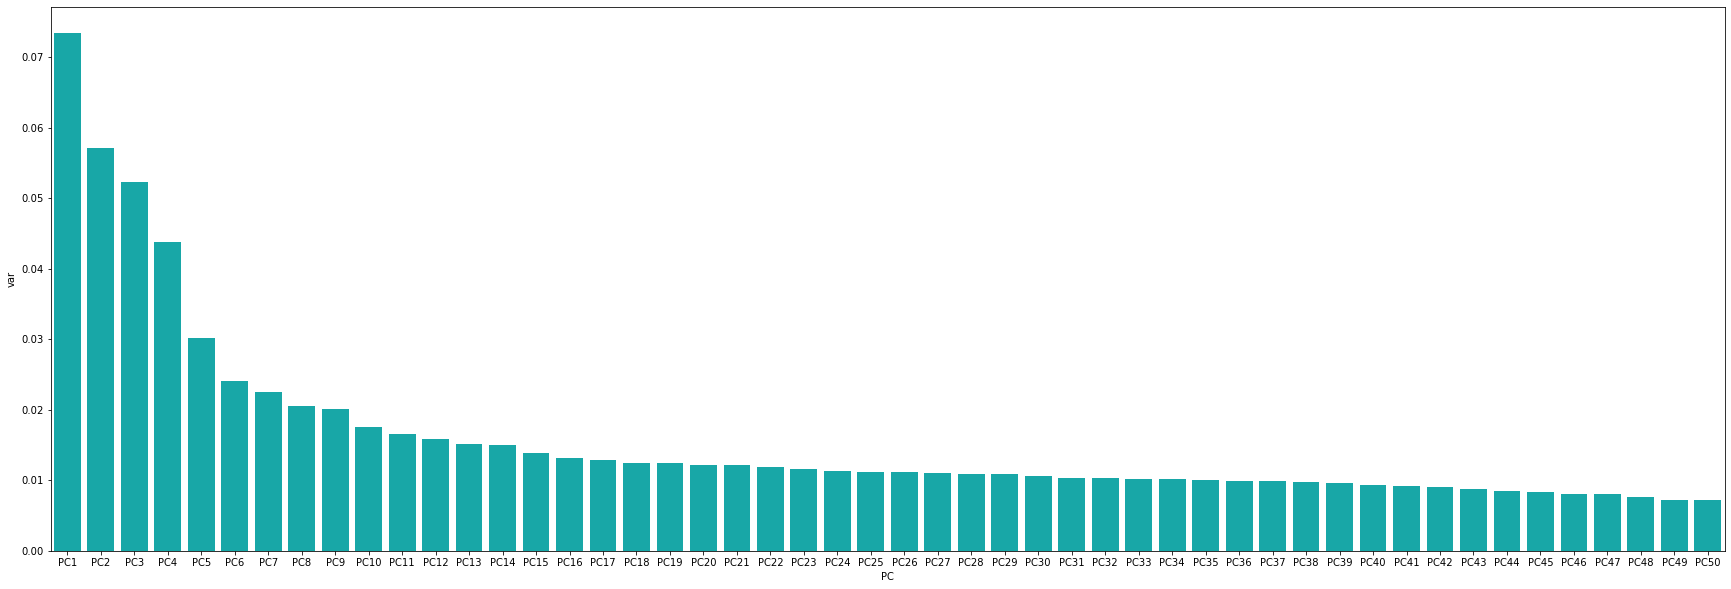

In [ ]:
PC = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10',
     'PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20',
     'PC21','PC22','PC23','PC24','PC25','PC26','PC27','PC28','PC29','PC30',
     'PC31','PC32','PC33','PC34','PC35','PC36','PC37','PC38','PC39','PC40',
     'PC41','PC42','PC43','PC44','PC45','PC46','PC47','PC48','PC49','PC50']
pca_df = pd.DataFrame({'var':pca.explained_variance_ratio_, 'PC':PC})
plt.figure(figsize=(30,10))
sns.barplot(x='PC',y="var", data=pca_df, color="c");

## MinMaxScaler

In [56]:
data_minmax = data_t[:]

In [57]:
datos_min_max = preprocessing.MinMaxScaler().fit_transform(data_minmax)
datos_min_max =pd.DataFrame(datos_min_max, columns=[data_t.columns])
datos_min_max

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes,RainTomorrow_No,RainTomorrow_Yes,Year,Month,Day,Season
0,0.532609,0.496359,0.3,0.591667,0.540541,0.592593,0.646341,0.22,0.200301,0.258929,...,1.0,0.0,1.0,0.0,1.0,0.0,0.1,1.000000,0.000000,0.000000
1,0.369565,0.549757,0.0,0.591667,0.108108,0.543210,0.317073,0.25,0.287651,0.279762,...,0.0,1.0,1.0,0.0,1.0,0.0,0.1,1.000000,0.033333,0.000000
2,0.519022,0.564320,0.0,0.625000,0.513514,0.641975,0.243902,0.30,0.197289,0.306548,...,0.0,1.0,1.0,0.0,1.0,0.0,0.1,1.000000,0.066667,0.000000
3,0.418478,0.620146,0.0,0.258333,0.297297,0.222222,0.329268,0.16,0.498494,0.428571,...,0.0,0.0,1.0,0.0,1.0,0.0,0.1,1.000000,0.100000,0.000000
4,0.644022,0.724515,0.5,0.541667,0.189189,0.493827,0.780488,0.33,0.293675,0.226190,...,0.0,0.0,1.0,0.0,1.0,0.0,0.1,1.000000,0.133333,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,0.263587,0.469660,0.0,0.375000,0.405405,0.320988,0.500000,0.27,0.712349,0.678571,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.454545,0.633333,0.666667
142189,0.244565,0.508495,0.0,0.375000,0.351351,0.271605,0.402439,0.24,0.709337,0.651786,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.454545,0.666667,0.666667
142190,0.266304,0.554612,0.0,0.225000,0.351351,0.222222,0.463415,0.21,0.676205,0.616071,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.454545,0.700000,0.666667
142191,0.315217,0.593447,0.0,0.475000,0.243243,0.222222,0.426829,0.24,0.600904,0.547619,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.454545,0.733333,0.666667


## Standard Scaler

In [54]:
data_standard = data_t[:]

In [55]:
datos_standard = preprocessing.StandardScaler().fit_transform(data_standard)
datos_standard = pd.DataFrame(datos_standard, columns=[data_t.columns])
datos_standard

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes,RainTomorrow_No,RainTomorrow_Yes,Year,Month,Day,Season
0,0.189954,-0.046523,0.123814,0.355148,0.711863,0.645076,0.112011,-1.435935,-1.515679,-1.247352,...,3.927735,-0.264980,0.548235,-0.532962,0.537551,-0.537551,-1.872674,1.633581,-1.672526,-1.357512
1,-0.749314,0.263687,-0.624276,0.355148,-1.159269,0.408307,-1.325794,-1.289821,-1.075290,-1.140554,...,-0.254600,3.773863,0.548235,-0.532962,0.537551,-0.537551,-1.872674,1.633581,-1.558865,-1.357512
2,0.111681,0.348290,-0.624276,0.519073,0.594918,0.881846,-1.645306,-1.046299,-1.530865,-1.003243,...,-0.254600,3.773863,0.548235,-0.532962,0.537551,-0.537551,-1.872674,1.633581,-1.445205,-1.357512
3,-0.467534,0.672601,-0.624276,-1.284104,-0.340649,-1.130695,-1.272542,-1.728162,-0.012283,-0.377715,...,-0.254600,-0.264980,0.548235,-0.532962,0.537551,-0.537551,-1.872674,1.633581,-1.331544,-1.357512
4,0.831787,1.278921,0.622540,0.109260,-0.808432,0.171537,0.697783,-0.900186,-1.044919,-1.415176,...,-0.254600,-0.264980,0.548235,-0.532962,0.537551,-0.537551,-1.872674,1.633581,-1.217883,-1.357512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,-1.359838,-0.201628,-0.624276,-0.710366,0.127134,-0.657156,-0.527014,-1.192413,1.065909,0.903856,...,-0.254600,-0.264980,0.548235,-0.532962,0.537551,-0.537551,1.668895,-0.117480,0.487026,0.454224
142189,-1.469420,0.023979,-0.624276,-0.710366,-0.106757,-0.893925,-0.953030,-1.338526,1.050724,0.766545,...,-0.254600,-0.264980,0.548235,-0.532962,0.537551,-0.537551,1.668895,-0.117480,0.600687,0.454224
142190,-1.344184,0.291888,-0.624276,-1.448029,-0.106757,-1.130695,-0.686770,-1.484639,0.883680,0.583463,...,-0.254600,-0.264980,0.548235,-0.532962,0.537551,-0.537551,1.668895,-0.117480,0.714348,0.454224
142191,-1.062404,0.517496,-0.624276,-0.218591,-0.574540,-1.130695,-0.846526,-1.338526,0.504034,0.232557,...,3.927735,-0.264980,0.548235,-0.532962,0.537551,-0.537551,1.668895,-0.117480,0.828008,0.454224


## Normalizer

In [52]:
data_normalizer = data_t[:]

In [53]:
datos_normalizer = preprocessing.Normalizer().fit_transform(data_normalizer)
datos_normalizer = pd.DataFrame(datos_normalizer, columns=[data_t.columns])
datos_normalizer

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes,RainTomorrow_No,RainTomorrow_Yes,Year,Month,Day,Season
0,0.009382,0.016034,0.000420,0.030808,0.014004,0.016804,0.049713,0.015404,0.705576,0.705156,...,0.000700,0.0000,0.000700,0.0,0.000700,0.0,0.000700,0.007702,0.000000,0.000700
1,0.005176,0.017558,0.000000,0.030778,0.002798,0.015389,0.030778,0.017488,0.706926,0.704967,...,0.000000,0.0007,0.000700,0.0,0.000700,0.0,0.000700,0.007695,0.000700,0.000700
2,0.009031,0.017993,0.000000,0.032205,0.013302,0.018203,0.026604,0.021003,0.705432,0.706202,...,0.000000,0.0007,0.000700,0.0,0.000700,0.0,0.000700,0.007701,0.001400,0.000700
3,0.006400,0.019478,0.000000,0.016696,0.007652,0.006261,0.031305,0.011131,0.707902,0.704563,...,0.000000,0.0000,0.000696,0.0,0.000696,0.0,0.000696,0.007652,0.002087,0.000696
4,0.012233,0.022579,0.000699,0.028661,0.004893,0.013981,0.057322,0.023069,0.706596,0.703240,...,0.000000,0.0000,0.000699,0.0,0.000699,0.0,0.000699,0.007690,0.002796,0.000699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,0.002415,0.015044,0.000000,0.021392,0.010351,0.008971,0.040714,0.018632,0.707121,0.704705,...,0.000000,0.0000,0.000690,0.0,0.000690,0.0,0.006901,0.003450,0.013111,0.002070
142189,0.001934,0.016159,0.000000,0.021408,0.008977,0.007596,0.035219,0.016574,0.707556,0.704587,...,0.000000,0.0000,0.000691,0.0,0.000691,0.0,0.006906,0.003453,0.013811,0.002072
142190,0.002489,0.017490,0.000000,0.015209,0.008987,0.006222,0.038714,0.014518,0.707567,0.704525,...,0.000000,0.0000,0.000691,0.0,0.000691,0.0,0.006913,0.003457,0.014518,0.002074
142191,0.003741,0.018636,0.000000,0.025634,0.006235,0.006235,0.036718,0.016627,0.707349,0.704439,...,0.000693,0.0000,0.000693,0.0,0.000693,0.0,0.006928,0.003464,0.015242,0.002078


## Robust Scaler

In [47]:
data_robust = data_t[:]
for col in data_t:
    print(col)

MinTemp
MaxTemp
Rainfall
WindGustSpeed
WindSpeed9am
WindSpeed3pm
Humidity9am
Humidity3pm
Pressure9am
Pressure3pm
Temp9am
Temp3pm
RISK_MM
Location_Adelaide
Location_Albany
Location_Albury
Location_AliceSprings
Location_BadgerysCreek
Location_Ballarat
Location_Bendigo
Location_Brisbane
Location_Cairns
Location_Canberra
Location_Cobar
Location_CoffsHarbour
Location_Dartmoor
Location_Darwin
Location_GoldCoast
Location_Hobart
Location_Katherine
Location_Launceston
Location_Melbourne
Location_MelbourneAirport
Location_Mildura
Location_Moree
Location_MountGambier
Location_MountGinini
Location_Newcastle
Location_Nhil
Location_NorahHead
Location_NorfolkIsland
Location_Nuriootpa
Location_PearceRAAF
Location_Penrith
Location_Perth
Location_PerthAirport
Location_Portland
Location_Richmond
Location_Sale
Location_SalmonGums
Location_Sydney
Location_SydneyAirport
Location_Townsville
Location_Tuggeranong
Location_Uluru
Location_WaggaWagga
Location_Walpole
Location_Watsonia
Location_Williamtown
Locatio

In [49]:
datos_robust = preprocessing.RobustScaler().fit_transform(data_robust)
datos_robust = pd.DataFrame(datos_robust, columns=[data_t.columns])
datos_robust

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes,RainTomorrow_No,RainTomorrow_Yes,Year,Month,Day,Season
0,0.152174,0.019417,0.75,0.333333,0.583333,0.487493,0.038462,-1.052950,-1.199248,-0.971215,...,1.0,0.0,0.0,0.0,0.0,0.0,-1.25,1.0,-1.000000,-1.0
1,-0.500000,0.233010,0.00,0.333333,-0.750000,0.305675,-1.000000,-0.945807,-0.849850,-0.887881,...,0.0,1.0,0.0,0.0,0.0,0.0,-1.25,1.0,-0.933333,-1.0
2,0.097826,0.291262,0.00,0.466667,0.500000,0.669311,-1.230769,-0.767236,-1.211296,-0.780739,...,0.0,1.0,0.0,0.0,0.0,0.0,-1.25,1.0,-0.866667,-1.0
3,-0.304348,0.514563,0.00,-1.000000,-0.166667,-0.876143,-0.961538,-1.267236,-0.006477,-0.292643,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.25,1.0,-0.800000,-1.0
4,0.597826,0.932039,1.25,0.133333,-0.500000,0.123857,0.461538,-0.660093,-0.825754,-1.102167,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.25,1.0,-0.733333,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,-0.923913,-0.087379,0.00,-0.533333,0.166667,-0.512507,-0.423077,-0.874379,0.848945,0.707357,...,0.0,0.0,0.0,0.0,0.0,0.0,1.00,0.0,0.266667,1.0
142189,-1.000000,0.067961,0.00,-0.533333,0.000000,-0.694325,-0.730769,-0.981522,0.836897,0.600214,...,0.0,0.0,0.0,0.0,0.0,0.0,1.00,0.0,0.333333,1.0
142190,-0.913043,0.252427,0.00,-1.133333,0.000000,-0.876143,-0.538462,-1.088665,0.704366,0.457357,...,0.0,0.0,0.0,0.0,0.0,0.0,1.00,0.0,0.400000,1.0
142191,-0.717391,0.407767,0.00,-0.133333,-0.333333,-0.876143,-0.653846,-0.981522,0.403162,0.183547,...,1.0,0.0,0.0,0.0,0.0,0.0,1.00,0.0,0.466667,1.0


In [58]:
#Regresion Lineal
X = datos_min_max.drop(["RainTomorrow"],1)
y = datos_min_max["RainTomorrow"]
#Crear modelo
regressor = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.3, random_state = 10)
#Entrenamiento
model = regressor.fit(X_train , y_train)
y_pred = model.predict(X_test)
puntaje_regresion = format(np.sqrt(r2_score((y_test),(y_pred))))
print('-----------Metricas a evaluar--------')
print()
print(f"R2 score regresión simple: {r2_score(y_test,y_pred)}")
print(f"MAE score regresió simple: {mean_absolute_error(y_test,y_pred)}")
print(f"MSE score regresió simple: {mean_squared_error(y_test,y_pred)}")
print("Score del modelo de regresión Lineal: " + str(puntaje_regresion))

KeyError: 'RainTomorrow'

### Regresion Logistica

In [230]:
data_t = pd.read_csv('data_t.csv')
data_t

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day,Season
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,...,1007.7,1007.1,16.9,21.8,0.0,0,2008,12,1,Summer
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,...,1010.6,1007.8,17.2,24.3,0.0,0,2008,12,2,Summer
2,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,...,1007.6,1008.7,21.0,23.2,0.0,0,2008,12,3,Summer
3,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,...,1017.6,1012.8,18.1,26.5,0.0,0,2008,12,4,Summer
4,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,...,1010.8,1006.0,17.8,29.7,0.0,0,2008,12,5,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,Uluru,3.5,21.8,0.0,E,31.0,ESE,E,15.0,13.0,...,1024.7,1021.2,9.4,20.9,0.0,0,2017,6,20,Winter
142189,Uluru,2.8,23.4,0.0,E,31.0,SE,ENE,13.0,11.0,...,1024.6,1020.3,10.1,22.4,0.0,0,2017,6,21,Winter
142190,Uluru,3.6,25.3,0.0,NNW,22.0,SE,N,13.0,9.0,...,1023.5,1019.1,10.9,24.5,0.0,0,2017,6,22,Winter
142191,Uluru,5.4,26.9,0.0,N,37.0,SE,WNW,9.0,9.0,...,1021.0,1016.8,12.5,26.1,0.0,0,2017,6,23,Winter


In [231]:
data_t = data_t.dropna()
data_t.shape

(123710, 22)

In [232]:
col_names = data_t.columns

col_names

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow',
       'Year', 'Month', 'Day', 'Season'],
      dtype='object')

In [233]:
from sklearn import preprocessing

numerical = [var for var in data_t.columns if data_t[var].dtype=='float64']

for col in numerical:
    data_t[col] = preprocessing.scale(data_t[col])
   
data_t.head()


,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day,Season
0,Albury,0.154880,-0.080312,0.142912,W,0.296301,W,WNW,0.633889,0.592555,...,-1.477067,-1.209429,-0.057134,-0.013982,-0.537832,0,2008,12,1,Summer
1,Albury,-0.787642,0.225700,-0.613573,WNW,0.296301,NNW,WSW,-1.364035,0.351385,...,-1.037701,-1.102950,-0.010764,0.344549,-0.537832,0,2008,12,2,Summer
2,Albury,0.076337,0.309157,-0.613573,WSW,0.457830,W,WSW,0.509019,0.833725,...,-1.492218,-0.966048,0.576593,0.186795,-0.537832,0,2008,12,3,Summer
3,Albury,-0.504885,0.629079,-0.613573,NE,-1.318998,SE,E,-0.489943,-1.216218,...,0.022840,-0.342382,0.128347,0.660056,-0.537832,0,2008,12,4,Summer
4,Albury,0.798937,1.227193,0.647236,W,0.054006,ENE,NW,-0.989424,0.110216,...,-1.007399,-1.376754,0.081977,1.118975,-0.537832,0,2008,12,5,Summer


In [234]:
categorical = [var for var in data_t.columns if data_t[var].dtype=='object']

print("Numero de variables categoricas: ", len(categorical))

print(categorical)

Numero de variables categoricas:  5
['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'Season']


In [235]:
categorical_columns = ['Location','WindGustDir', 'WindDir3pm', 'WindDir9am', 'Season']


# print unique values in each column

for col in categorical_columns:
    print(np.unique(data_t[col]))

data_t = pd.get_dummies(data_t, columns=categorical_columns)

['Adelaide' 'Albury' 'AliceSprings' 'BadgerysCreek' 'Ballarat' 'Bendigo'
 'Brisbane' 'Cairns' 'Canberra' 'Cobar' 'CoffsHarbour' 'Dartmoor' 'Darwin'
 'GoldCoast' 'Hobart' 'Katherine' 'Launceston' 'Melbourne'
 'MelbourneAirport' 'Mildura' 'Moree' 'MountGambier' 'MountGinini' 'Nhil'
 'NorahHead' 'NorfolkIsland' 'Nuriootpa' 'PearceRAAF' 'Penrith' 'Perth'
 'PerthAirport' 'Portland' 'Richmond' 'Sale' 'SalmonGums' 'Sydney'
 'SydneyAirport' 'Townsville' 'Tuggeranong' 'Uluru' 'WaggaWagga' 'Walpole'
 'Watsonia' 'Williamtown' 'Witchcliffe' 'Wollongong' 'Woomera']
['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']
['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']
['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW']
['Autumn' 'Spring' 'Summer' 'Winter']


In [236]:
data_t[["Location_Adelaide", "Location_Albury", "Location_AliceSprings", "WindGustDir_NE", "WindDir3pm_W"]]

,Location_Adelaide,Location_Albury,Location_AliceSprings,WindGustDir_NE,WindDir3pm_W
0,0,1,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,1,0,1,0
4,0,1,0,0,0
...,...,...,...,...,...
142188,0,0,0,0,0
142189,0,0,0,0,0
142190,0,0,0,0,0
142191,0,0,0,0,0


In [237]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# set X to all features
X = data_t.loc[:,data_t.columns!='RainTomorrow']
# set y to our target RainTomorrow
y = data_t.RainTomorrow
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


logReg = LogisticRegression()
logReg.fit(X_train,y_train)


LogisticRegression()

In [238]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean


cv = KFold(n_splits=10, random_state=1, shuffle=True)


scores = cross_val_score(logReg, X, y, scoring='accuracy', cv=cv)
average_score = mean(scores)

print('Precision:', average_score)

Precision: 0.8426642955298682


### Division y entrenamiento

In [131]:
from sklearn.model_selection import train_test_split

X = data_t.drop('RainTomorrow', axis = 1)
y = data_t['RainTomorrow']

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.30)


### Árbol de decisión

In [133]:
from sklearn.tree import DecisionTreeClassifier

In [134]:
dtree = DecisionTreeClassifier()

In [135]:
dtree.fit (X_train, y_train)

DecisionTreeClassifier()

In [136]:
predictions = dtree.predict(X_test)

In [137]:
from sklearn.metrics import classification_report, confusion_matrix

In [138]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87     28952
           1       0.53      0.54      0.54      8161

    accuracy                           0.79     37113
   macro avg       0.70      0.70      0.70     37113
weighted avg       0.80      0.79      0.80     37113



In [139]:
print (confusion_matrix(y_test,predictions))

[[25064  3888]
 [ 3733  4428]]


In [140]:
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

print("Accuracy: " , metrics.accuracy_score(y_test,predictions))
print("Recall: " , round(recall_score(y_test, predictions, average="macro"),2))
print("Precision: " , round(metrics.precision_score(y_test,predictions,average="macro"),2))


Accuracy:  0.7946541643090023
Recall:  0.7
Precision:  0.7


### Random forest

In [141]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train);

In [142]:
rfc_pred = rfc.predict(X_test)

In [143]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91     28952
           1       0.78      0.49      0.60      8161

    accuracy                           0.86     37113
   macro avg       0.82      0.73      0.76     37113
weighted avg       0.85      0.86      0.84     37113



In [144]:
#Matriz de confusion
print (confusion_matrix(y_test,rfc_pred))

[[27789  1163]
 [ 4147  4014]]


In [145]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

print("Accuracy: " , metrics.accuracy_score(y_test,rfc_pred))
print("Recall: " , round(recall_score(y_test, rfc_pred, average="macro"),2))
print("Precision: " , round(metrics.precision_score(y_test,rfc_pred,average="macro"),2))


Accuracy:  0.8569234500040417
Recall:  0.73
Precision:  0.82


In [146]:
print('precisión del modelo de arbol de decisión :', dtree.score(X_test, y_test))
print('precisión del modelo de bosque aleatorio  :', rfc.score(X_test, y_test))
print('precisión del modelo de regresion logistica  :', average_score)

precisión del modelo de arbol de decisión : 0.7946541643090023
precisión del modelo de bosque aleatorio  : 0.8569234500040417
precisión del modelo de regresion logistica  : 0.8426642955298682
